<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#What-is-Custering?" data-toc-modified-id="What-is-Custering?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What is Custering?</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li><li><span><a href="#Partitional-Clustering" data-toc-modified-id="Partitional-Clustering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Partitional Clustering</a></span></li><li><span><a href="#Methods-for-selecting-the-optimal-number-of-clusters" data-toc-modified-id="Methods-for-selecting-the-optimal-number-of-clusters-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Methods for selecting the optimal number of clusters</a></span></li></ul></li><li><span><a href="#Importing-Dataset" data-toc-modified-id="Importing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Dataset</a></span></li><li><span><a href="#K-means" data-toc-modified-id="K-means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-means</a></span></li><li><span><a href="#Hierarchical-clustering" data-toc-modified-id="Hierarchical-clustering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hierarchical clustering</a></span></li></ul></div>

# Clustering

## What is Custering?

Clustering is the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups.Particularly, this process aims to identify natural groupings or clusters within 
multidimensional data based on some similarity measure(e.g Euclidean distance)

## Hierarchical Clustering

Algorithms in this category generate a cluster tree (or dendrogram) by using 
heuristic splitting or merging techniques. The algorithm groups similar objects into groups called clusters. The endpoint 
is a set of clusters or groups, where each cluster is distinct from each other 
cluster, and the objects within each cluster are broadly similar to each other.

![SegmentLocal](n.gif "segment")

This clustering technique is divided into two types:
* Algorithms that use splitting to generate the cluster tree are called **divisive**.

* Algorithms that use merging to generate the cluster tree are called **agglomerative**.

**Math Formula**

Either type of hierarchical clustering, the data set X is partitioned into Q
sets {$H_1$, …, $H_Q$}. 

That is, if subsets $C_i$ and $C_j$ satisfy that $C_i$ ∈ $H_m$, $C_j$ ∈ $H_l$, and m > l, 

then either $C_i$⊂$C_j$ or $C_i$∩$C_j$=∅ for all i≠j, m, l = 1, …, Q.


**Advantages**

* It is robust in the presence of noise in the data set

* The number of clusters need not to be specified a priori

* They are independent of the initial conditions


**Disadvantages**

* They are computationally expensive
* They are static, i.e. patterns assigned to a cluster cannot move to another 
cluster
* They may fail to separate overlapping clusters due to a lack of information 
about the global shape or size of the clusters


## Partitional Clustering 

Partitional clustering algorithms divide the data set into a specified number of 
clusters. These algorithms try to minimize certain criteria (e.g. a square error 
function) and can therefore be treated as optimization problems.

**K-means**

The K-means algorithm minimizes the intra-cluster distance. The K-means algorithm starts with K centroids (initial values for the
centroids are randomly selected or derived from a priori information). Then, each
pattern in the data set is assigned to the closest cluster (i.e. closest centroid). Finally,
the centroids are recalculated according to the associated patterns. This process is
repeated until convergence is achieved.

![SegmentLocal](kmeans.gif "segment")


**Math formula**

![SegmentLocal](kmeans.png)

## Methods for selecting the optimal number of clusters

* **Elbow Method**

It is the most popular method for determining the optimal number of clusters. The method is based on calculating the Within-Cluster-Sum of Squared Errors (WSS) for different number of clusters (k) and **selecting the k for which change in WSS first starts to diminish**.
The idea behind the elbow method is that the explained variation changes rapidly for a small number of clusters and then it slows down leading to an elbow formation in the curve. The elbow point is the number of clusters we can use for our clustering algorithm. 

![](elbow.png)

* **Silhouette Coefficient**

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a **high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters**. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

![](sil.png)

* **Dendogram**

To get the optimal number of clusters for hierarchical clustering, we make use a dendrogram which is tree-like chart that shows the sequences of merges or splits of clusters.
If two clusters are merged, the dendrogram will join them in a graph and the height of the join will be the distance between those clusters.

**In the dendrogram locate the largest vertical difference between nodes, and in the middle pass an horizontal line. The number of vertical lines intersecting it is the optimal number of clusters.** 

![](dend.png)

# Importing Dataset

In [13]:
from sklearn import datasets
import pandas as pd

# load iris dataset
iris = datasets.load_iris()

X=pd.DataFrame(iris.data)
X.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
X.dropna(how="all", inplace=True) # remove any empty lines
X.head()

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-means

C:\Users\User\anaconda3\envs\stats\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


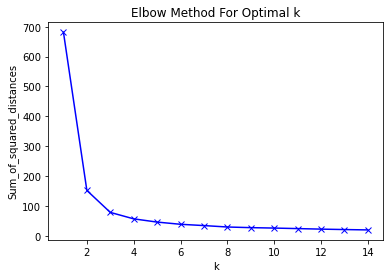

In [10]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

There are 2 points which can be the elbow. A 3 cluster solution is definitely the better one as after it there is no much to gain. A 2 cluster solution in this case whould be suboptimal as the leap from 2 to 3 is very big in terms of wcss.

So the optimal number of clusters is 3

# Hierarchical clustering

Now, we will generate a dendrogram of the data.


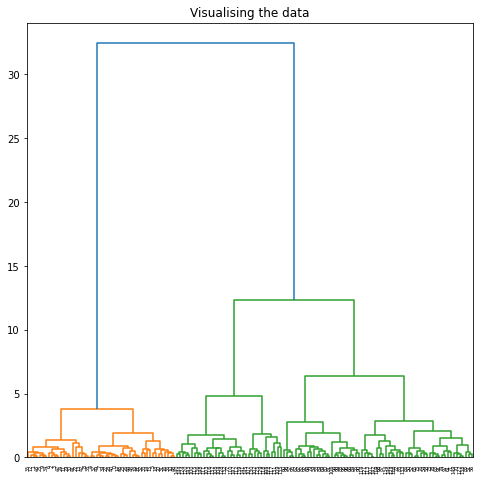

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

print("Now, we will generate a dendrogram of the data.")
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

This dendrogram shows the hierarchical clustering of row data points based on euclidean distance. It also tells the suitable number of clusters with different colors in the dendrogram. But the optimal choice of clusters can be based on the horizontal lines in the dendrogram i.e. number of clusters should be 2.

**for K=2**

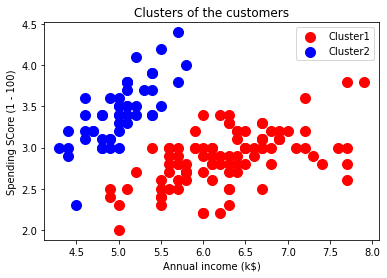

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = 'ward')
hc_pred = hc.fit_predict(X)

X=X.values
plt.scatter(X[hc_pred==0,0], X[hc_pred==0,1], s = 100, c = 'red', label ='Cluster1')
plt.scatter(X[hc_pred==1,0], X[hc_pred==1,1], s = 100, c = 'blue', label ='Cluster2')


plt.title('Clusters of the customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending SCore (1 - 100)')
plt.legend()
plt.show()

**for K=3**

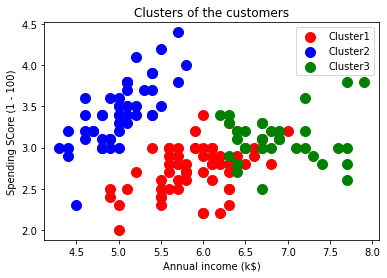

In [16]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = 'ward')
hc_pred = hc.fit_predict(X)

plt.scatter(X[hc_pred==0,0], X[hc_pred==0,1], s = 100, c = 'red', label ='Cluster1')
plt.scatter(X[hc_pred==1,0], X[hc_pred==1,1], s = 100, c = 'blue', label ='Cluster2')
plt.scatter(X[hc_pred==2,0], X[hc_pred==2,1], s = 100, c = 'green', label = 'Cluster3')

plt.title('Clusters of the customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending SCore (1 - 100)')
plt.legend()
plt.show()

**for K=4**

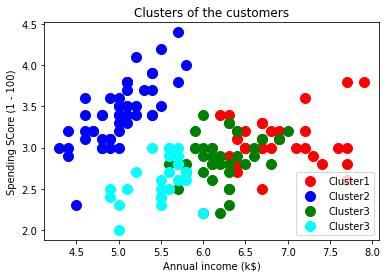

In [19]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = 'ward')
hc_pred = hc.fit_predict(X)

plt.scatter(X[hc_pred==0,0], X[hc_pred==0,1], s = 100, c = 'red', label ='Cluster1')
plt.scatter(X[hc_pred==1,0], X[hc_pred==1,1], s = 100, c = 'blue', label ='Cluster2')
plt.scatter(X[hc_pred==2,0], X[hc_pred==2,1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[hc_pred==3,0], X[hc_pred==3,1], s = 100, c = 'cyan', label = 'Cluster4')

plt.title('Clusters of the customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending SCore (1 - 100)')
plt.legend()
plt.show()

So the optimal number of clusters is 2